In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [3]:
arquivos = os.listdir('Arquivos')
file = open(r'Arquivos/' + arquivos[0] , 'rb')
X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(file)

In [4]:
# Concatenando as bases de treino e validação
X_train = np.vstack((X_train, X_val))
y_train = np.vstack((y_train, y_val))

In [5]:
# Ajustando o target de treino
y_train[y_train == 0] = 0
y_train[(y_train > 0) & (y_train <= 5)] = 1
y_train[(y_train > 5) & (y_train <= 25)] = 2
y_train[(y_train > 25) & (y_train <= 50)] = 3
y_train[y_train > 50] = 4

In [6]:
# Ajustando o terget de teste
y_test[y_test == 0] = 0
y_test[(y_test > 0) & (y_test <= 5)] = 1
y_test[(y_test > 5) & (y_test <= 25)] = 2
y_test[(y_test > 25) & (y_test <= 50)] = 3
y_test[y_test > 50] = 4

In [7]:
# Gradient Boosting
model = GradientBoostingClassifier()
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

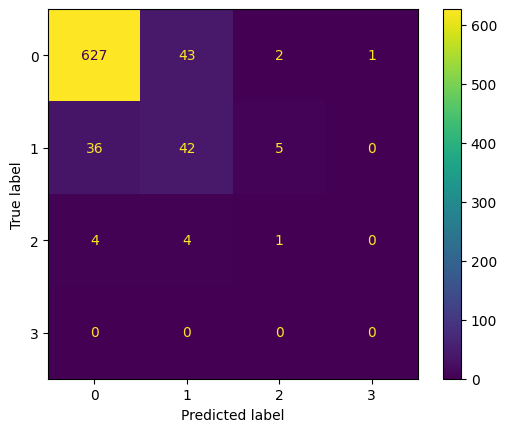

In [8]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       673
         1.0       0.47      0.51      0.49        83
         2.0       0.12      0.11      0.12         9
         3.0       0.00      0.00      0.00         0

    accuracy                           0.88       765
   macro avg       0.38      0.39      0.39       765
weighted avg       0.88      0.88      0.88       765



c:\Users\ipand\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ipand\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ipand\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
